<a href="https://colab.research.google.com/github/8Ishita8/8Ishita8/blob/main/PIMA_Dimensional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

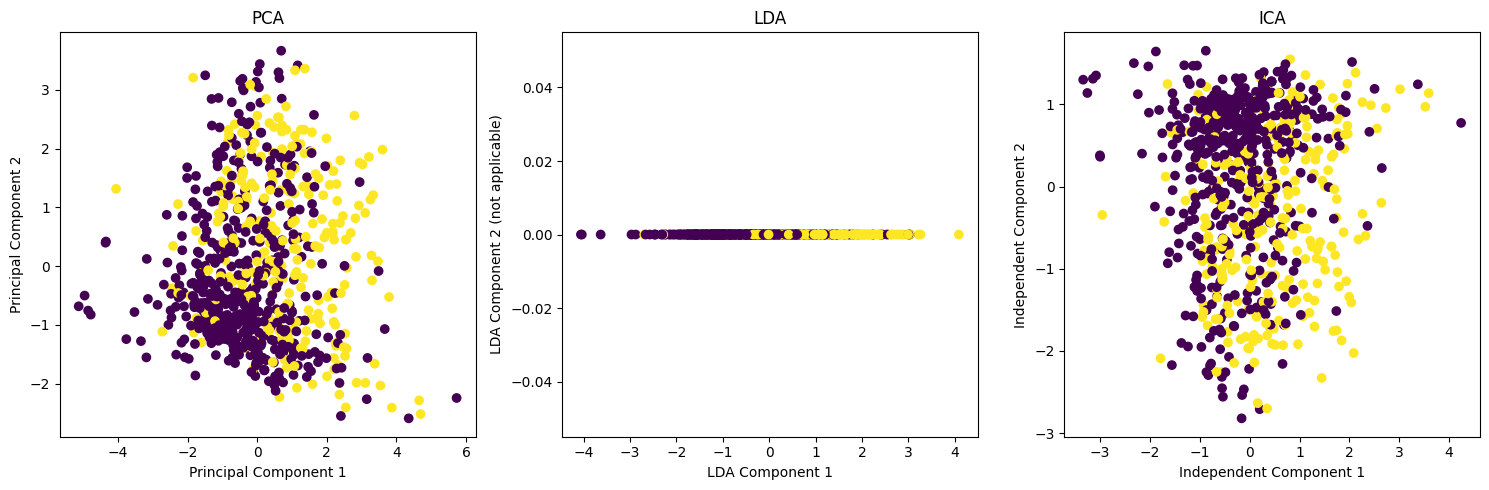

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Load the PIMA Indian Diabetes dataset from GitHub
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

pima = pd.read_csv(url, header=None, names=column_names)

# Features (all columns except the last one) and target (last column)
X = pima.iloc[:, :-1].values
y = pima.iloc[:, -1].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# LDA (adjusting n_components to 1)
lda = LDA(n_components=1)  # Set n_components to 1
X_lda = lda.fit_transform(X, y)

# ICA
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_scaled)

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# PCA plot
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax[0].set_title('PCA')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# LDA plot
ax[1].scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis')  # Use 0 for the y-axis since LDA only gives one component
ax[1].set_title('LDA')
ax[1].set_xlabel('LDA Component 1')
ax[1].set_ylabel('LDA Component 2 (not applicable)')

# ICA plot
ax[2].scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='viridis')
ax[2].set_title('ICA')
ax[2].set_xlabel('Independent Component 1')
ax[2].set_ylabel('Independent Component 2')

plt.tight_layout()
plt.show()